In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
from datetime import date
from scipy import stats

today = str(date.today())
numberofboxes = 20
cover = 100.0/numberofboxes

%matplotlib inline

def create_ranges():
    ranges = []
    current = 0.0
    while(current < 100.0):
        copy = Range(current, min(current + cover, 100.0))
        current += cover 
        ranges.append(copy)
    return ranges


3134
407
223
140
83
64


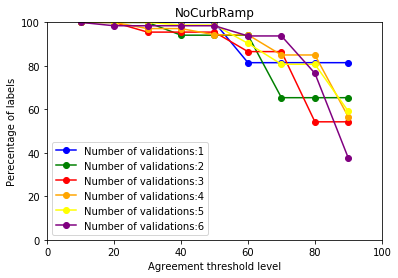

2305
309
140
118
84
58


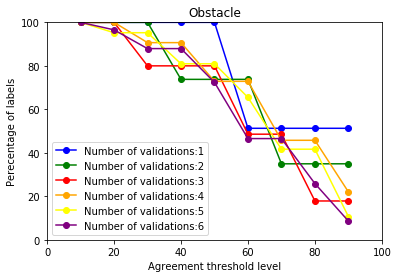

3879
552
204
75
36
11


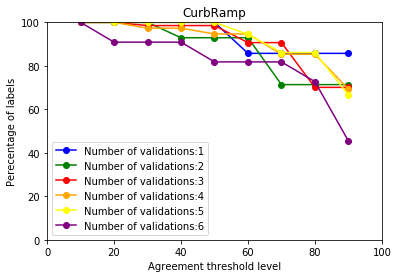

2675
311
163
124
104
85


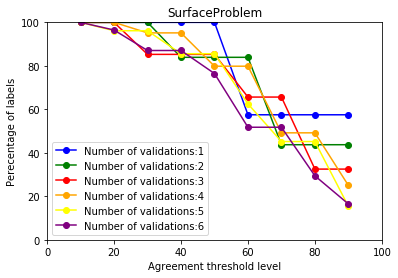

In [2]:
colors = ['blue','green','red','orange','yellow','purple']
labels = ["NoCurbRamp","Obstacle", "CurbRamp", "SurfaceProblem"]

def make_scatter(x,y, count): 
    plt.xlim(0,100)
    plt.ylim(0, 100)
    plt.plot(x,y, color = colors[count], marker='o', markerfacecolor= colors[count])

def import_from_file(number):
    dict = {}
    after = {}
    path = "validations-seattle.csv"
    with open(path, 'r') as csvfile:
        csvreader = csv.reader(csvfile) 
        next(csvreader)
        for row in csvreader:
            pano_id = row[2]
            x = row[3]
            y = row[4]
            complete = pano_id + "," + x + "," + y
            agree = (row[5] == "agree")
            labeltype = row[6]
            if complete in dict:
                dict[complete].append(agree)
            else:
                dict[complete] = [labeltype, True, agree]
    after = {}
    for key,prediction in dict.items():
        if(len(prediction) - 2 == number):
            after[key] = prediction
    return after

def make_graph():
    for label in labels:
        for count in range(1, 7): 
            after = import_from_file(count)
            x = [i for i in range(10,100, 10)]
            y= [0 for i in range(len(x))]
            counter = 0
            for key,prediction in after.items():
                currentlabel = prediction.pop(0)
                if (currentlabel != label):
                    continue
                works = 0
                counter += 1
                for pred in prediction:
                    if(pred):
                        works += 1
                currentagreement = (100.0 * works)/len(prediction)
                for i in range(0,len(x)):
                    if(currentagreement >= x[i]):
                        y[i] += 1
            if(counter == 0):
                continue
            for i in range(0,len(y)):
                y[i] = (100.0 * y[i])/counter
            make_scatter(x,y,count - 1)
        legend = [("Number of validations:" + str(i)) for i in range(1,7)]
        plt.xlabel('Agreement threshold level')
        plt.ylabel('Perecentage of labels')
        plt.title(label)
        plt.legend(legend)
        plt.show()

make_graph()